In [11]:
import numpy as np
import pandas as pd

# Need to build a model based off the factors given
# Need to build models for the factors to predict their values in 2122
# Using values predicted for the factors, plug into model build on exisitng data

# To DO

* Read in data files
* Make years and countries constant
* Combine data sets
* Model based off of factors
* Model for the factors
* Predict factors for 2122
* Used predicted values of factors for 2122 to plug into model built for population

In [68]:
life = pd.read_csv("life-expectancy.csv") # Source: https://ourworldindata.org/life-expectancy

In [758]:
fertility = pd.read_csv("fertility-rate.csv") # Source: https://ourworldindata.org/fertility-rate

In [70]:
population = pd.read_csv("population.csv") # Source: https://ourworldindata.org/grapher/population-since-1800?country=CHN~IND~ZAF~NGA~USA~IRN~BRA

In [71]:
population.head()

,Entity,Code,Year,Population (historical estimates)
0,Afghanistan,AFG,1800,3280000
1,Afghanistan,AFG,1801,3280000
2,Afghanistan,AFG,1802,3280000
3,Afghanistan,AFG,1803,3280000
4,Afghanistan,AFG,1804,3280000


In [79]:
life.head()

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350


In [74]:
fertility.head()

,Entity,Code,Year,"Estimates, 1950 - 2020: Annually interpolated demographic indicators - Total fertility (live births per woman)"
0,Afghanistan,AFG,1950,7.45
1,Afghanistan,AFG,1951,7.45
2,Afghanistan,AFG,1952,7.45
3,Afghanistan,AFG,1953,7.45
4,Afghanistan,AFG,1954,7.45


In [75]:
fertility.columns

Index(['Entity', 'Code', 'Year',
       'Estimates, 1950 - 2020: Annually interpolated demographic indicators - Total fertility (live births per woman)'],
      dtype='object')

In [131]:
# Change the column name 
# Estimates, 1950 - 2020: Annually interpolated demographic indicators - Total fertility (live births per woman)
# to
# Rate
fertility = fertility.rename(columns={'Estimates, 1950 - 2020: Annually interpolated demographic indicators - Total fertility (live births per woman)' : 'Rate'})

In [132]:
# Change the column name 
# Entity
# to
# Country
fertility = fertility.rename(columns={'Entity' : 'Country'})

In [133]:
fertility.head() # Checking column title name change went through as expected

,Country,Code,Year,Rate
0,Afghanistan,AFG,1950,7.45
1,Afghanistan,AFG,1951,7.45
2,Afghanistan,AFG,1952,7.45
3,Afghanistan,AFG,1953,7.45
4,Afghanistan,AFG,1954,7.45


In [81]:
# See what is the earliest year of the data sets being used
max(fertility["Year"].min(), life["Year"].min())

1950

In [83]:
min(fertility["Year"].max(), life["Year"].max())

2019

In [84]:
fertility["Year"].max()

2020

In [85]:
life["Year"].max()

2019

In [ ]:
# Only include data from 1950 to 2019
population = population[population['Year'] >= 1950]
population = population[population['Year'] <= 2019]

population = population[population['Year'] >= 1950]
population = population[population['Year'] <= 2019]

population = population[population['Year'] >= 1950]
population = population[population['Year'] <= 2019]

# Getting 2122 Values for Factors

### Fertility Rate

In [754]:
fertility.head()

,Entity,Code,Year,"Estimates, 1950 - 2020: Annually interpolated demographic indicators - Total fertility (live births per woman)"
0,Afghanistan,AFG,1950,7.45
1,Afghanistan,AFG,1951,7.45
2,Afghanistan,AFG,1952,7.45
3,Afghanistan,AFG,1953,7.45
4,Afghanistan,AFG,1954,7.45


In [759]:
fertility.columns

Index(['Entity', 'Code', 'Year',
       'Estimates, 1950 - 2020: Annually interpolated demographic indicators - Total fertility (live births per woman)'],
      dtype='object')

Let's change up the column names to have better labels and drop the Code column

In [760]:
# Change the column name 
# Estimates, 1950 - 2020: Annually interpolated demographic indicators - Total fertility (live births per woman)
# to
# Rate
fertility = fertility.rename(columns={'Estimates, 1950 - 2020: Annually interpolated demographic indicators - Total fertility (live births per woman)' : 'Rate'})

In [761]:
# Change the column name 
# Entity
# to
# Country
fertility = fertility.rename(columns={'Entity' : 'Country'})

In [763]:
fertility = fertility.drop(["Code"], axis = 1)

In [764]:
fertility.head()

,Country,Year,Rate
0,Afghanistan,1950,7.45
1,Afghanistan,1951,7.45
2,Afghanistan,1952,7.45
3,Afghanistan,1953,7.45
4,Afghanistan,1954,7.45


Now going to One Hot Encode the countries in the fertility data in order to deal with the categorical data of countries

In [766]:
import category_encoders as ce
# Source: https://stackoverflow.com/questions/55609815/onehotencoder-change-name-columns
# Source: https://pypi.org/project/category-encoders/
fertDum = fertility
ohe = ce.OneHotEncoder(handle_unknown='ignore', 
    use_cat_names=True)
label_fournisseur = ohe.fit_transform(list(fertDum['Country']))
label_fournisseur.columns = [ x[2:] for x in label_fournisseur.columns ]
oheFert = fertDum.join(label_fournisseur)
oheFert

,Country,Year,Rate,Afghanistan,Africa,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,...,Vanuatu,Venezuela,Vietnam,Western Africa,Western Asia,Western Sahara,World,Yemen,Zambia,Zimbabwe
0,Afghanistan,1950,7.450,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Afghanistan,1951,7.450,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Afghanistan,1952,7.450,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Afghanistan,1953,7.450,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Afghanistan,1954,7.450,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Afghanistan,1955,7.450,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Afghanistan,1956,7.450,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Afghanistan,1957,7.450,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Afghanistan,1958,7.450,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Afghanistan,1959,7.450,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that the countries are One Hot Encoded, we can drop the column Country in oheFert

In [767]:
oheFert = oheFert.drop(["Country"], axis = 1)

In [768]:
oheFert.head()

,Year,Rate,Afghanistan,Africa,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,...,Vanuatu,Venezuela,Vietnam,Western Africa,Western Asia,Western Sahara,World,Yemen,Zambia,Zimbabwe
0,1950,7.45,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1951,7.45,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1952,7.45,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1953,7.45,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954,7.45,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


With oheFert containing the One Hot Encoding of the countries with properly labeled column titles and the unnecessary columns dropped, we can build a logistic regression model on this data. For the model, X will be the Year and all of the OHE country labels while Y will be the Fertility rate. Will just use a default 80/20 split with the large number of entries available

In [769]:
from sklearn.model_selection import train_test_split
# Source: https://www.geeksforgeeks.org/how-to-split-a-dataset-into-train-and-test-sets-using-python/
X = oheFert.drop(["Rate"], axis = 1)
y = oheFert.iloc[:, 1:2]

trainX, testX, trainY, testY = train_test_split(X, y, test_size=.2)

print('X train shape:',trainX.shape)
print('X test shape:',testX.shape)
print('Y train shape:',trainY.shape)
print('Y test shape:',testY.shape)

X train shape: (13972, 247)
X test shape: (3494, 247)
Y train shape: (13972, 1)
Y test shape: (3494, 1)


In [770]:
mlr = LinearRegression()  
mlr.fit(trainX, trainY)

LinearRegression()

Now let's see what the 2122 fertility rate predictions look like for each country...

In [771]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(fertility['Country']))}
class_mapping

{'Afghanistan': 0,
 'Africa': 1,
 'Albania': 2,
 'Algeria': 3,
 'Angola': 4,
 'Antigua and Barbuda': 5,
 'Argentina': 6,
 'Armenia': 7,
 'Aruba': 8,
 'Asia': 9,
 'Asia, Central': 10,
 'Australia': 11,
 'Australia & New Zealand': 12,
 'Austria': 13,
 'Azerbaijan': 14,
 'Bahamas': 15,
 'Bahrain': 16,
 'Bangladesh': 17,
 'Barbados': 18,
 'Belarus': 19,
 'Belgium': 20,
 'Belize': 21,
 'Benin': 22,
 'Bhutan': 23,
 'Bolivia': 24,
 'Bosnia and Herzegovina': 25,
 'Botswana': 26,
 'Brazil': 27,
 'Brunei': 28,
 'Bulgaria': 29,
 'Burkina Faso': 30,
 'Burundi': 31,
 'Cambodia': 32,
 'Cameroon': 33,
 'Canada': 34,
 'Cape Verde': 35,
 'Caribbean': 36,
 'Central African Republic': 37,
 'Central America': 38,
 'Central and Southern Asia': 39,
 'Chad': 40,
 'Channel Islands': 41,
 'Chile': 42,
 'China': 43,
 'Colombia': 44,
 'Comoros': 45,
 'Congo': 46,
 'Costa Rica': 47,
 "Cote d'Ivoire": 48,
 'Croatia': 49,
 'Cuba': 50,
 'Curacao': 51,
 'Cyprus': 52,
 'Czechia': 53,
 'Democratic Republic of Congo': 5

In [773]:
predictedFertilityRate = {}
fertCountries = np.unique(fertility['Country'])
for key, value in class_mapping.items():
    temp = [0] * len(fertCountries)
    temp[value] = 1
    a = np.insert(temp, 0, 2122)
    #print(a)
    predictedFertilityRate[key] = mlr.predict([a])
    
predictedFertilityRate

{'Afghanistan': array([[0.25697021]]),
 'Africa': array([[-0.87300089]]),
 'Albania': array([[-3.12119969]]),
 'Algeria': array([[-1.53224439]]),
 'Angola': array([[-0.08103151]]),
 'Antigua and Barbuda': array([[-3.953081]]),
 'Argentina': array([[-3.87888802]]),
 'Armenia': array([[-4.02430978]]),
 'Aruba': array([[-3.88475465]]),
 'Asia': array([[-2.90806478]]),
 'Asia, Central': array([[-2.78873106]]),
 'Australia': array([[-4.46294488]]),
 'Australia & New Zealand': array([[-4.43467828]]),
 'Austria': array([[-4.92047902]]),
 'Azerbaijan': array([[-3.26008819]]),
 'Bahamas': array([[-3.82786987]]),
 'Bahrain': array([[-2.33220699]]),
 'Bangladesh': array([[-1.82649362]]),
 'Barbados': array([[-4.304619]]),
 'Belarus': array([[-4.68972271]]),
 'Belgium': array([[-4.81128433]]),
 'Belize': array([[-1.91680742]]),
 'Benin': array([[-0.64132328]]),
 'Bhutan': array([[-1.73888177]]),
 'Bolivia': array([[-1.81626022]]),
 'Bosnia and Herzegovina': array([[-4.41512024]]),
 'Botswana': arr

That doesn't look very realistic of the model predicting so many negative fertility rates in 2122. Below will look at some simple statistical tests to see how the model does on the testing data

In [774]:
yhat = []
for r in range(len(testX)):
    toPredict = testX.iloc[r, :]
    val = mlr.predict([toPredict])
    yhat.append(val[0][0])
yhat
    

[8.100851673559305,
 3.1287688626231187,
 3.826328669466534,
 0.6400151778061911,
 5.482084372717452,
 5.445539670843132,
 4.039002466521012,
 1.4944755439557156,
 0.6968037480378939,
 6.951340376165419,
 2.4449822167166957,
 4.32950028938221,
 3.814882654587038,
 8.105226635369135,
 5.060922045871791,
 3.5590125511373145,
 7.3679851473596045,
 6.047598083550241,
 6.462371702324674,
 4.131840649214894,
 2.105116872373486,
 5.541565720524332,
 2.582490294593754,
 3.5836877346860945,
 1.289986620548916,
 3.178168569431179,
 3.66914013506036,
 2.0434252211768182,
 4.667435566497886,
 4.032009667398796,
 1.9878135627949405,
 3.046130080463996,
 4.386651103368578,
 4.47654991356066,
 3.774385076156193,
 4.963438377801424,
 1.5464601691627138,
 1.3002560146900208,
 3.974330075118303,
 1.5840455539990472,
 4.27067210219262,
 6.749183314018978,
 2.494316018600614,
 0.5856704008635631,
 2.4160505374855603,
 2.681723031683987,
 4.538004085305161,
 4.4473003026438676,
 4.348275521619456,
 4.59554

In [775]:
# Source : https://www.datatechnotes.com/2019/10/accuracy-check-in-python-mae-mse-rmse-r.html
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(testY, yhat)
mse = metrics.mean_squared_error(testY, yhat)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(testY,yhat)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.5788457856386523
MSE: 0.512541254725671
RMSE: 0.7159198661342421
R-Squared: 0.8703107698100453


Errors don't seem that far off and a pretty good R^2 score for the model against the testing data. However, will need to adjust something in order to get more realistic results as all of the negative predictions for fertility rate in 2122 are physically impossible

Let's take a look at the United States' Fertility Rate Year over Year and see if something pops out that can applied to adjust the model to produce more realistic predictions of 2122 Fertility Rates

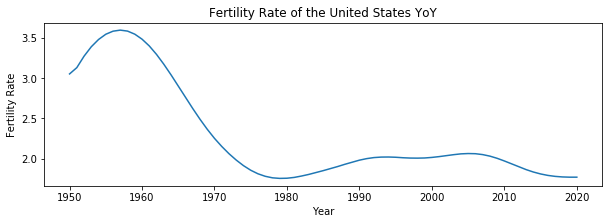

In [776]:
import matplotlib.pyplot as plt
usFert = oheFert.where(oheFert['United States'] == 1)
plt.figure(figsize=(10, 3))
plt.plot(usFert['Year'],usFert['Rate'])
plt.ylabel('Fertility Rate')
plt.xlabel('Year')
plt.title('Fertility Rate of the United States YoY')
plt.show()

Interesting view of the fertility rate of the United States year over year. It seems to be oscilating in a the 1-2 range since around 1980. Going to make a visualization below that has a slider to select a specific country to have their fertility rate plotted YoY like above

In [777]:
import plotly.express as px

# Neat little visualization of fertility rate for a selected country
# Source: https://plotly.com/python/sliders/
# Source: https://plotly.com/python/line-and-scatter/
fig = px.scatter(fertility, x="Year", y="Rate", animation_frame="Country", animation_group="Year",
                 range_x=[1950,2020], range_y=[0,10],color='Rate')

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()

Each country seems to start off with a substantially higher fertility rate that drops pretty steeply from 1950 to 1980ish. Around 1980, each country's declining fertility rate seems to level off at range specific to that country (typically between 1-3)

Two new approaches to try after getting a better visualization of each country's fertility rate changing YoY:
* In order to take the more recent changes in technology and society, will just look at values of the 21st century to predict the fertility rate of each country for 2122 to take into account the leveling off trend shown above
* Change the model to take into account the logarithmic appearing curve of each country

In [778]:
fertRecent = oheFert.where(oheFert.Year >=int(2000))

In [779]:
fertRecent.head()

,Year,Rate,Afghanistan,Africa,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,...,Vanuatu,Venezuela,Vietnam,Western Africa,Western Asia,Western Sahara,World,Yemen,Zambia,Zimbabwe
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [780]:
fertRecent = fertRecent.dropna()
fertRecent.head()

,Year,Rate,Afghanistan,Africa,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,...,Vanuatu,Venezuela,Vietnam,Western Africa,Western Asia,Western Sahara,World,Yemen,Zambia,Zimbabwe
50,2000.0,7.485,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,2001.0,7.387,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,2002.0,7.272,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,2003.0,7.148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,2004.0,7.016,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [781]:
fertRecent['Year'] = fertRecent['Year'].astype(int)
fertRecent.head()

,Year,Rate,Afghanistan,Africa,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,...,Vanuatu,Venezuela,Vietnam,Western Africa,Western Asia,Western Sahara,World,Yemen,Zambia,Zimbabwe
50,2000,7.485,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,2001,7.387,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,2002,7.272,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,2003,7.148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,2004,7.016,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


fertRecent is now ready to be fed into the regression model...

In [782]:
# Source: https://www.geeksforgeeks.org/how-to-split-a-dataset-into-train-and-test-sets-using-python/
X = fertRecent.drop(["Rate"], axis = 1)
y = fertRecent.iloc[:, 1:2]

trainX, testX, trainY, testY = train_test_split(X, y, test_size=.2)

print('X train shape:',trainX.shape)
print('X test shape:',testX.shape)
print('Y train shape:',trainY.shape)
print('Y test shape:',testY.shape)
mlr = LinearRegression()  
mlr.fit(trainX, trainY)

X train shape: (4132, 247)
X test shape: (1034, 247)
Y train shape: (4132, 1)
Y test shape: (1034, 1)


LinearRegression()

In [783]:
recentPredictedFertilityRate = {}

for key, value in class_mapping.items():
    temp = [0] * len(fertCountries)
    temp[value] = 1
    a = []
    a = np.insert(temp, 0, 2122)
    recentPredictedFertilityRate[key] = mlr.predict([a])
    
recentPredictedFertilityRate

{'Afghanistan': array([[2.81668501]]),
 'Africa': array([[1.50656963]]),
 'Albania': array([[-1.53495754]]),
 'Algeria': array([[-0.4922836]]),
 'Angola': array([[2.81220728]]),
 'Antigua and Barbuda': array([[-1.21238454]]),
 'Argentina': array([[-0.9019906]]),
 'Armenia': array([[-1.58842]]),
 'Aruba': array([[-1.46945853]]),
 'Asia': array([[-0.98728206]]),
 'Asia, Central': array([[-0.63302558]]),
 'Australia': array([[-1.46009363]]),
 'Australia & New Zealand': array([[-1.39301752]]),
 'Austria': array([[-1.84441186]]),
 'Azerbaijan': array([[-1.25510565]]),
 'Bahamas': array([[-1.44869496]]),
 'Bahrain': array([[-0.992155]]),
 'Bangladesh': array([[-0.82225366]]),
 'Barbados': array([[-1.54945953]]),
 'Belarus': array([[-1.71982094]]),
 'Belgium': array([[-1.53356133]]),
 'Belize': array([[-0.51037756]]),
 'Benin': array([[2.08205674]]),
 'Bhutan': array([[-0.79437253]]),
 'Bolivia': array([[0.07216237]]),
 'Bosnia and Herzegovina': array([[-1.93864447]]),
 'Botswana': array([[-0

The model still predicts quite a few negative fertility rates even when it is just being trained on data of the 21st century. Time to try the second approach

In [784]:
fertScaled = oheFert

In [785]:
fertScaled.head()

,Year,Rate,Afghanistan,Africa,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,...,Vanuatu,Venezuela,Vietnam,Western Africa,Western Asia,Western Sahara,World,Yemen,Zambia,Zimbabwe
0,1950,7.45,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1951,7.45,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1952,7.45,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1953,7.45,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954,7.45,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [788]:
# Function that will be used to scale each year
def func(x):
    return 1/np.log(x/1940.0)

In [789]:
fertScaled["ScaledYear"] = func(fertScaled["Year"])
fertScaled.head()

,Year,Rate,Afghanistan,Africa,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,...,Venezuela,Vietnam,Western Africa,Western Asia,Western Sahara,World,Yemen,Zambia,Zimbabwe,ScaledYear
0,1950,7.45,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,194.499572
1,1951,7.45,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,176.863165
2,1952,7.45,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,162.166153
3,1953,7.45,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,149.730213
4,1954,7.45,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,139.070829


In [791]:
# Source: https://www.geeksforgeeks.org/how-to-split-a-dataset-into-train-and-test-sets-using-python/
X = fertScaled.drop(["Rate"], axis = 1)
X = X.drop(["Year"], axis = 1)
y = fertScaled.iloc[:, 1:2]

trainX, testX, trainY, testY = train_test_split(X, y, test_size=.2)

print('X train shape:',trainX.shape)
print('X test shape:',testX.shape)
print('Y train shape:',trainY.shape)
print('Y test shape:',testY.shape)

X train shape: (13972, 247)
X test shape: (3494, 247)
Y train shape: (13972, 1)
Y test shape: (3494, 1)


In [792]:
scaledMLR = LinearRegression()  
scaledMLR.fit(trainX, trainY)

LinearRegression()

In [793]:
scaledPredictions = {}

for key, value in class_mapping.items():
    temp = [0] * len(fertCountries)
    temp[value] = 1
    a = []
    a = np.insert(temp, 0, 2122)
    scaledPredictions[key] = scaledMLR.predict([a])
    
scaledPredictions

{'Afghanistan': array([[5.84933033e+12]]),
 'Africa': array([[5.84933033e+12]]),
 'Albania': array([[5.84933033e+12]]),
 'Algeria': array([[5.84933033e+12]]),
 'Angola': array([[5.84933033e+12]]),
 'Antigua and Barbuda': array([[5.84933033e+12]]),
 'Argentina': array([[5.84933033e+12]]),
 'Armenia': array([[5.84933033e+12]]),
 'Aruba': array([[5.84933033e+12]]),
 'Asia': array([[5.84933033e+12]]),
 'Asia, Central': array([[5.84933033e+12]]),
 'Australia': array([[5.84933033e+12]]),
 'Australia & New Zealand': array([[5.84933033e+12]]),
 'Austria': array([[5.84933033e+12]]),
 'Azerbaijan': array([[5.84933033e+12]]),
 'Bahamas': array([[5.84933033e+12]]),
 'Bahrain': array([[5.84933033e+12]]),
 'Bangladesh': array([[5.84933033e+12]]),
 'Barbados': array([[5.84933033e+12]]),
 'Belarus': array([[5.84933033e+12]]),
 'Belgium': array([[5.84933033e+12]]),
 'Belize': array([[5.84933033e+12]]),
 'Benin': array([[5.84933033e+12]]),
 'Bhutan': array([[5.84933033e+12]]),
 'Bolivia': array([[5.8493

I guess this model is a little bit better that it isn't predicting negative fertility rates anymore, but it is just predicting every country to have (pretty much) the same fertility rate in 2122 which isn't right either

To get a more accurate prediction for each country, let's try this log scaling technique, but just build a seperate model for each country and aggregate their results. To start, let's try this approach just on the United States' fertility rate and see how the model looks compared to the actual data...

In [798]:
usFert["ScaledYear"] = func(usFert["Year"])
usFert = usFert.dropna()
usFert.head(8)

,Year,Rate,Afghanistan,Africa,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,...,Venezuela,Vietnam,Western Africa,Western Asia,Western Sahara,World,Yemen,Zambia,Zimbabwe,ScaledYear
16401,1950.0,3.052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194.499572
16402,1951.0,3.130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176.863165
16403,1952.0,3.272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,162.166153
16404,1953.0,3.389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,149.730213
16405,1954.0,3.479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139.070829
16406,1955.0,3.544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.832691
16407,1956.0,3.582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121.749316
16408,1957.0,3.595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.616920


In [799]:
xUS = usFert["ScaledYear"]
yUS = usFert["Rate"]

In [801]:
xUS = xUS.ravel()
yUS = yUS.ravel()
xUS = xUS.reshape(-1, 1)

In [802]:
usMLR = LinearRegression()  
usMLR.fit(xUS, yUS)

LinearRegression()

In [794]:
years = list(range(1950, 2123))
years

[1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2030,
 2031,
 2032,
 2033,
 2034,
 2035,
 2036,
 2037,
 2038,
 2039,
 2040,
 2041,
 2042,
 2043,
 2044,
 2045,
 2046,
 2047,
 2048,
 2049,
 2050,
 2051,
 2052,
 2053,
 2054,
 2055,
 2056,
 2057,
 2058,
 2059,
 2060,
 2061,
 2062,
 2063,
 2064,
 2065,
 2066,
 2067,
 2068,
 2069,
 2070,
 2071,
 2072,
 2073,
 2074,
 2075,
 2076,
 2077,
 2078,
 2079,
 2080,
 2081,
 2082,
 2083,
 2084,
 2085,
 2086,
 2087,
 2088,
 2089,
 2090,
 2091,
 2092,

In [796]:
logYears = []
for i in range(len(years)):
    yearVal = func(years[i])
    logYears.append(yearVal)

In [803]:
usPred = []
for year in logYears:
    temp = [year]
    predVal = usMLR.predict([temp])
    usPred.append(predVal)

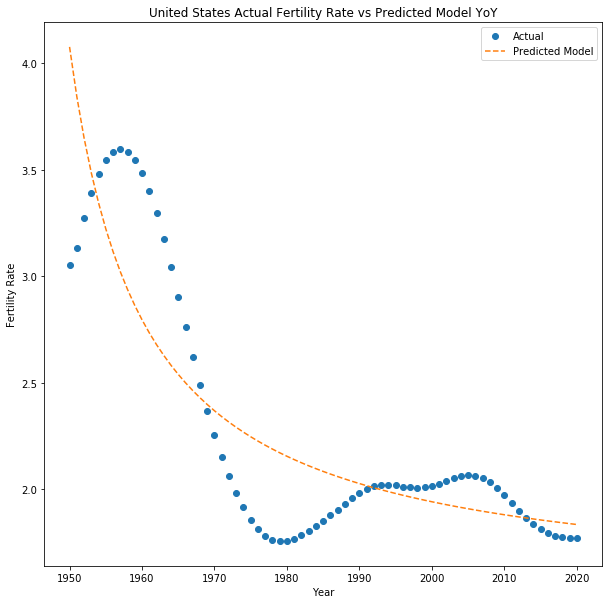

In [806]:
plt.figure(figsize=(10, 10))
plt.plot(usFert["Year"], usFert["Rate"],  linestyle='', marker='o', label='Actual')
plt.plot(usFert["Year"], yearPred[:len(usFert)],  linestyle='--', label='Predicted Model')
plt.ylabel("Fertility Rate")
plt.xlabel("Year")
plt.title("United States Actual Fertility Rate vs Predicted Model YoY")
plt.legend()

This model seems to be producing a much more accurate representation of the fertility rate and that it is trending in the right direction moving forward. Let's see what the predicted values of all the countries for 2122 are following this approach

In [807]:
logPredictedCountriesFertilityRate = {}
toPredict = logYears[-1]
toPredict = toPredict.reshape(-1, 1)
for country in fertCountries:
    subsetData = fertility.where(fertility["Country"] == country)
    subsetData = subsetData.dropna()
    subsetData["ScaledYear"] = func(subsetData["Year"])
    xSub = subsetData["ScaledYear"]
    ySub = subsetData["Rate"]
    xSub = xSub.ravel()
    ySub = ySub.ravel()
    xSub = xSub.reshape(-1, 1)
    subMLR = LinearRegression()  
    subMLR.fit(xSub, ySub)
    predVal = subMLR.predict(toPredict)
    logPredictedCountriesFertilityRate[country] = predVal

logPredictedCountriesFertilityRate 

{'Afghanistan': array([6.56259245]),
 'Africa': array([5.26141546]),
 'Albania': array([1.80824968]),
 'Algeria': array([3.51430728]),
 'Angola': array([6.8447852]),
 'Antigua and Barbuda': array([1.72832302]),
 'Argentina': array([2.61104168]),
 'Armenia': array([1.60719054]),
 'Aruba': array([1.3333467]),
 'Asia': array([2.38719256]),
 'Asia, Central': array([3.04513053]),
 'Australia': array([1.66855584]),
 'Australia & New Zealand': array([1.68468684]),
 'Austria': array([1.41602657]),
 'Azerbaijan': array([2.16277095]),
 'Bahamas': array([2.00068323]),
 'Bahrain': array([2.58672108]),
 'Bangladesh': array([3.36225414]),
 'Barbados': array([1.33295822]),
 'Belarus': array([1.52657093]),
 'Belgium': array([1.58549344]),
 'Belize': array([3.39302024]),
 'Benin': array([6.08931928]),
 'Bhutan': array([3.588953]),
 'Bolivia': array([3.74024835]),
 'Bosnia and Herzegovina': array([1.02970034]),
 'Botswana': array([3.63461661]),
 'Brazil': array([1.99467731]),
 'Brunei': array([2.0721582

Nice! All positive and differing values that seem to be much more realistic...

### End of Fertility Rate

# Other Scrap Work

In [73]:
life["Entity"].nunique()

243

As shown above, the number of unique countries between the data sets life expectancy and fertility rate do not match up. Will need to work on dealing with these differences...

In [32]:
print(np.setdiff1d(countries, fertCountries))

['American Samoa' 'Americas' 'Andorra' 'Anguilla' 'Bermuda'
 'Bonaire Sint Eustatius and Saba' 'British Virgin Islands'
 'Cayman Islands' 'Cook Islands' 'Dominica' 'Faeroe Islands'
 'Falkland Islands' 'Gibraltar' 'Greenland' 'Isle of Man' 'Liechtenstein'
 'Marshall Islands' 'Monaco' 'Montserrat' 'Nauru' 'Niue'
 'Northern Mariana Islands' 'Palau' 'Saint Barthlemy' 'Saint Helena'
 'Saint Kitts and Nevis' 'Saint Martin (French part)'
 'Saint Pierre and Miquelon' 'San Marino' 'Sint Maarten (Dutch part)'
 'Tokelau' 'Turks and Caicos Islands' 'Tuvalu' 'Vatican'
 'Wallis and Futuna']


In [35]:
diffCountries = np.setdiff1d(countries, fertCountries)

In [63]:

population = population[population['Year'] > 1961]

In [40]:
population[population['Entity'] == 'Zimbabwe']['Population (historical estimates)']

48148     1085814
48149     1085814
48150     1085814
48151     1085814
48152     1085814
48153     1085814
48154     1085814
48155     1085814
48156     1085814
48157     1085814
48158     1085814
48159     1085814
48160     1085814
48161     1085814
48162     1085814
48163     1085814
48164     1085814
48165     1085814
48166     1085814
48167     1082301
48168     1075333
48169     1064965
48170     1051251
48171     1034247
48172     1017518
48173     1001060
48174      984868
48175      968938
48176      953265
48177      937846
           ...   
48340    10900511
48341    11092775
48342    11261752
48343    11410721
48344    11541215
48345    11653254
48346    11747079
48347    11822722
48348    11881482
48349    11923906
48350    11954293
48351    11982219
48352    12019911
48353    12076697
48354    12155496
48355    12255920
48356    12379553
48357    12526964
48358    12697728
48359    12894323
48360    13115149
48361    13350378
48362    13586710
48363    13814642
48364    1

In [67]:
totalPop = 0
for c in diffCountries:
    #print(c)
    totalPop += np.sum(population[population['Entity'] == c]['Population (historical estimates)'].values)
#print(population[population['Entity'] 
    #print(population[population['Entity'] == 'American Samoa']['Population (historical estimates)'])
    #print(population[population['Entity'] == 'American Samoa']['Population (historical estimates)'][1])
    #totalPop += population[population['Entity'] == c]['Population (historical estimates)']
    #totalPop += population['Entity' == c]['Population (historical estimates)']
print(totalPop)
print(totalPop/60)

52296067
871601.1166666667


In [59]:
print(np.sum(print(population[population['Entity'] == 'American Samoa']['Population (historical estimates)'].values)))
#print(population[population['Entity'] == 'American Samoa']['Population (historical estimates)'][1])
    #totalPop += population[population['Entity'] 

[ 3005  3163  3339  3524  3720  3927  4145  4663  5246  5902  6639  7469
  8963 10756 12908 18941 19287 19546 19699 19758 19748 19712 19671 19690
 19827 20127 20605 21246 22029 22850 23675 24473 25235 25980 26698 27362
 27982 28564 29103 29595 30045 30455 30834 31262 31842 32648 33697 34969
 36413 37946 39521 41114 42741 44346 45894 47351 48682 49900 51025 52099
 53158 54209 55227 56180 57049 57816 58496 59077 59495 59684 59557 59109
 58367 57490 56675 56084 55755 55669 55717 55791 55806 55739 55617 55461
 55312 55197 55103]
None


In [60]:
print(np.sum(population[population['Entity'] == 'American Samoa']['Population (historical estimates)'].values))
#print(population[population['Entity'] == 'American Samoa']['Population (historical estimates)'][1])
    #totalPop += population[population['Entity'] 

2980396


In [29]:
countries = life["Entity"].unique()

In [30]:
fertCountries = fertility["Entity"].unique()

In [31]:
countries

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Americas', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equ

In [25]:
life

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350
5,Afghanistan,AFG,1955,29.854
6,Afghanistan,AFG,1956,30.365
7,Afghanistan,AFG,1957,30.882
8,Afghanistan,AFG,1958,31.403
9,Afghanistan,AFG,1959,31.925


In [9]:
fertility

,Entity,Code,Year,"Estimates, 1950 - 2020: Annually interpolated demographic indicators - Total fertility (live births per woman)"
0,Afghanistan,AFG,1950,7.450
1,Afghanistan,AFG,1951,7.450
2,Afghanistan,AFG,1952,7.450
3,Afghanistan,AFG,1953,7.450
4,Afghanistan,AFG,1954,7.450
5,Afghanistan,AFG,1955,7.450
6,Afghanistan,AFG,1956,7.450
7,Afghanistan,AFG,1957,7.450
8,Afghanistan,AFG,1958,7.450
9,Afghanistan,AFG,1959,7.450


In [12]:
fertility.columns

Index(['Entity', 'Code', 'Year',
       'Estimates, 1950 - 2020: Annually interpolated demographic indicators - Total fertility (live births per woman)'],
      dtype='object')

In [20]:
# Change the column name 
# Estimates, 1950 - 2020: Annually interpolated demographic indicators - Total fertility (live births per woman)
# to Fertility Rate
fertility = fertility.rename(columns={'Estimates, 1950 - 2020: Annually interpolated demographic indicators - Total fertility (live births per woman)' : 'Fertility Rate'})

In [19]:
fertility

,Entity,Code,Year,Fertility Rate
0,Afghanistan,AFG,1950,7.450
1,Afghanistan,AFG,1951,7.450
2,Afghanistan,AFG,1952,7.450
3,Afghanistan,AFG,1953,7.450
4,Afghanistan,AFG,1954,7.450
5,Afghanistan,AFG,1955,7.450
6,Afghanistan,AFG,1956,7.450
7,Afghanistan,AFG,1957,7.450
8,Afghanistan,AFG,1958,7.450
9,Afghanistan,AFG,1959,7.450


Preciting these factors


Do we take averages on years s.t. combinding fertility rate, life expect, etc. of all countries?
Thinking above approach would be easiiest^, but could run into issues of importance of fertility rate across various countries i.e. do 

?'s = Dependency ratio, population density, 

literacy rate, average # of years in school

X = Country, Year, fertility rate, life expectancy, death rate, birth rate
Y = population

hierarchical model of taking in variance of each region